In [1]:
import numpy as np

In [2]:
from utils import data_preparation

In [3]:
data_set, data_info, testlodaer = data_preparation('cifar10')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
idcs = np.arange(len(data_set['train_data']))

In [5]:
print(idcs)

[    0     1     2 ... 49997 49998 49999]


In [6]:
type(idcs[0])

numpy.int32

In [7]:
from utils import data_preparation, gen_data_partition_iid, gen_data_partition_dirichlet, make_client_dataset_from_partition

In [8]:
rng = np.random.default_rng(0)

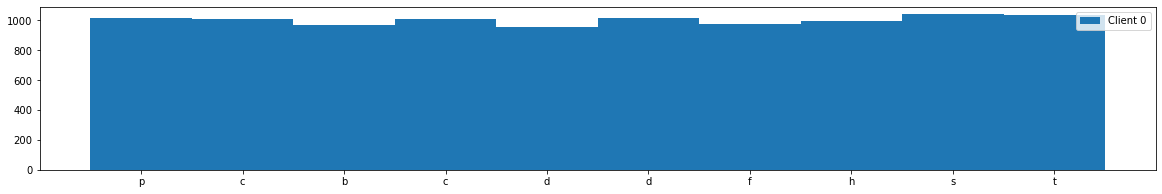

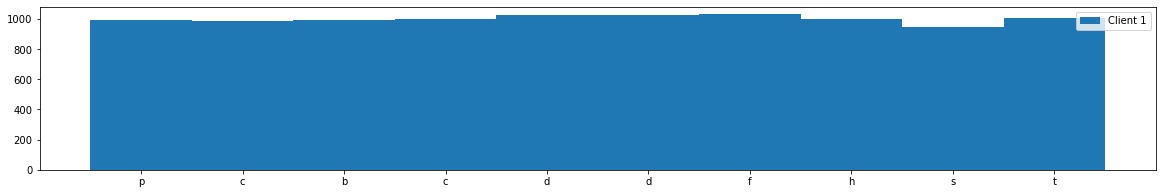

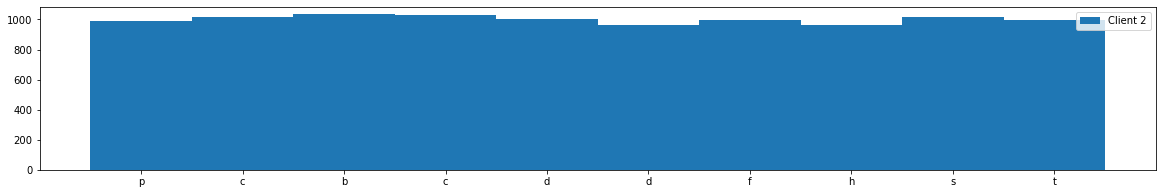

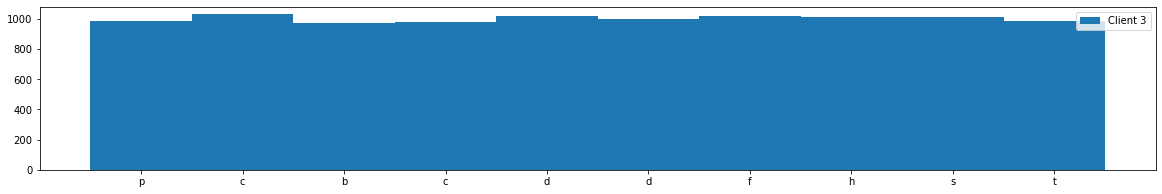

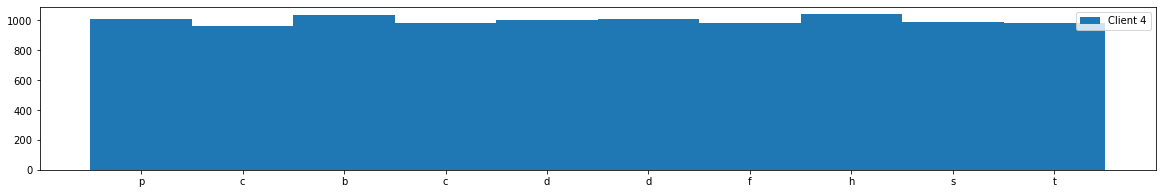

In [9]:
client_train_data_idcs, client_train_class_dict = gen_data_partition_iid(
    data=data_set['train_data'], 
    num_classes=data_info['num_classes'], 
    labels=data_set['train_labels'], 
    data_mapp=data_set['mapp'],
    num_clients=5, 
    generator=rng, 
    verbose_hist=True)

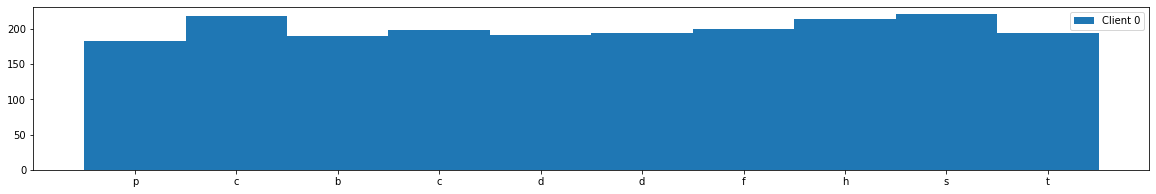

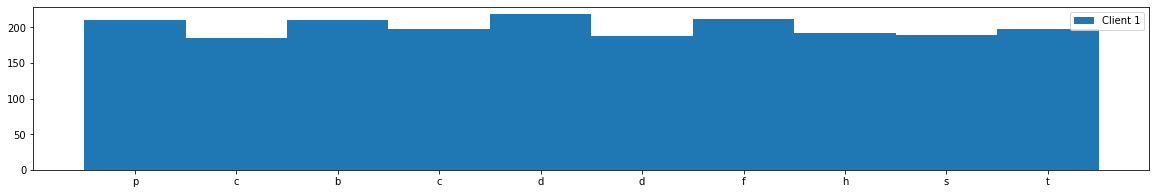

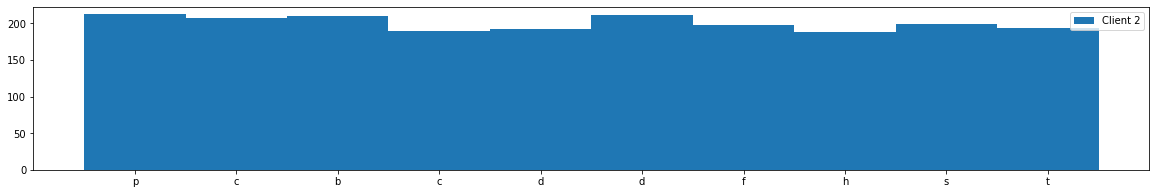

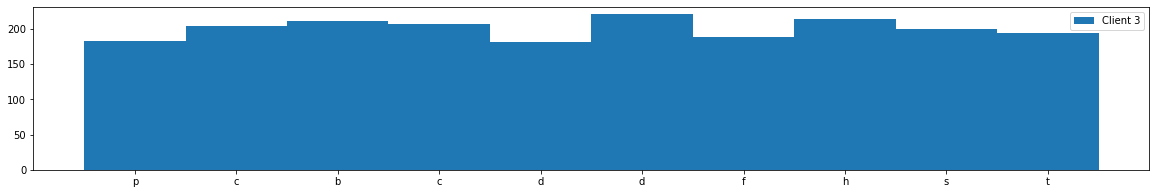

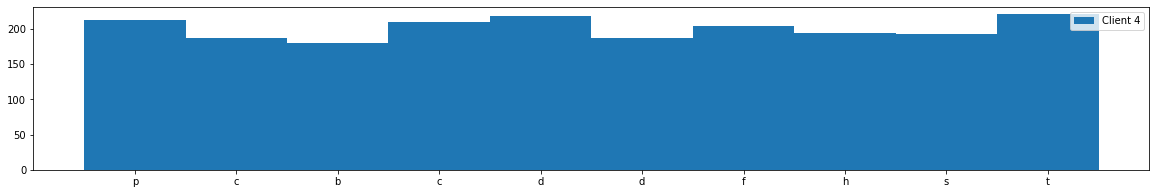

In [10]:
client_test_data_idcs, client_test_class_dict = gen_data_partition_iid(
    data=data_set['test_data'], 
    num_classes=data_info['num_classes'], 
    labels=data_set['test_labels'], 
    data_mapp=data_set['mapp'],
    num_clients=5, 
    generator=rng, 
    verbose_hist=True)

In [11]:
# client_data_train = make_client_dataset_from_partition(data_set['train_data'], 5, client_train_data_idcs, data_set['transform'])
# client_data_test = make_client_dataset_from_partition(data_set['test_data'], 5, client_test_data_idcs, data_set['transform'])

In [12]:
# data_0 = client_data_train[0]

In [13]:
from torchvision import datasets, transforms

In [14]:
tf=transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.201])

In [15]:
client_data_train = make_client_dataset_from_partition(data_set['train_data'], 5, client_train_data_idcs)
client_data_test = make_client_dataset_from_partition(data_set['test_data'], 5, client_test_data_idcs)

In [16]:
import torch

In [17]:
data_0 = client_data_train[0]

In [18]:
images_all = [torch.unsqueeze(data_0[i][0], dim=0) for i in range(len(data_0))]

In [22]:
data_0